In [1]:
!git clone https://HoonCantona@bitbucket.org/HoonCantona/selfdrivingproject.git

fatal: destination path 'selfdrivingproject' already exists and is not an empty directory.


In [1]:
%ls D:\jupyterCode\selfDrivingTraining\selfDTra02

 Volume in drive D is SeaGate
 Volume Serial Number is 4A46-C68D

 Directory of D:\jupyterCode\selfDrivingTraining\selfDTra02

05/12/2019  01:13 PM    <DIR>          .
05/12/2019  01:13 PM    <DIR>          ..
05/12/2019  01:12 PM           867,097 driving_log.csv
05/12/2019  01:13 PM    <DIR>          IMG
               1 File(s)        867,097 bytes
               3 Dir(s)  1,522,688,688,128 bytes free


In [21]:
!pip3 install imgaug

  Using cached https://files.pythonhosted.org/packages/17/a9/36de8c0e1ffb2d86f871cac60e5caa910cbbdb5f4741df5ef856c47f4445/imgaug-0.2.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/fb/7a7af9ef7a35d16fa23b127abee272cfc483ca89029b73e92e93cdf36e6b/Shapely-1.6.4.post2.tar.gz


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\ADMINI~1\AppData\Local\Temp\pip-install-i6jbrlu_\Shapely\setup.py", line 80, in <module>
        from shapely._buildcfg import geos_version_string, geos_version, \
      File "C:\Users\ADMINI~1\AppData\Local\Temp\pip-install-i6jbrlu_\Shapely\shapely\_buildcfg.py", line 200, in <module>
        lgeos = CDLL("geos_c.dll")
      File "c:\users\administrator\anaconda3\lib\ctypes\__init__.py", line 356, in __init__
        self._handle = _dlopen(self._name, mode)
    OSError: [WinError 126] The specified module could not be found
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\ADMINI~1\AppData\Local\Temp\pip-install-i6jbrlu_\Shapely\


In [22]:
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import random

ModuleNotFoundError: No module named 'imgaug'

In [3]:
datadir='D:\jupyterCode\selfDrivingTraining\selfDTra02'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

center  \
0  C:\Users\Administrator\Desktop\SelfDTra02\IMG\center_2019_05_12_13_06_46_371.jpg   
1  C:\Users\Administrator\Desktop\SelfDTra02\IMG\center_2019_05_12_13_06_46_477.jpg   
2  C:\Users\Administrator\Desktop\SelfDTra02\IMG\center_2019_05_12_13_06_46_587.jpg   
3  C:\Users\Administrator\Desktop\SelfDTra02\IMG\center_2019_05_12_13_06_46_688.jpg   
4  C:\Users\Administrator\Desktop\SelfDTra02\IMG\center_2019_05_12_13_06_46_795.jpg   

                                                                              left  \
0   C:\Users\Administrator\Desktop\SelfDTra02\IMG\left_2019_05_12_13_06_46_371.jpg   
1   C:\Users\Administrator\Desktop\SelfDTra02\IMG\left_2019_05_12_13_06_46_477.jpg   
2   C:\Users\Administrator\Desktop\SelfDTra02\IMG\left_2019_05_12_13_06_46_587.jpg   
3   C:\Users\Administrator\Desktop\SelfDTra02\IMG\left_2019_05_12_13_06_46_688.jpg   
4   C:\Users\Administrator\Desktop\SelfDTra02\IMG\left_2019_05_12_13_06_46_795.jpg   

                                                                              right  \
0   C:\Users\Administrator\Desktop\SelfDTra02\IMG\right_2019_05_12_13_06_46_371.jpg   
1   C:\Users\Administrator\Desktop\SelfDTra02\IMG\right_2019_05_12_13_06_46_477.jpg   
2   C:\Users\Administrator\Desktop\SelfDTra02\IMG\right_2019_05_12_13_06_46_587.jpg   
3   C:\Users\Administrator\Desktop\SelfDTra02\IMG\right_2019_05_12_13_06_46_688.jpg   
4   C:\Users\Administrator\Desktop\SelfDTra02\IMG\right_2019_05_12_13_06_46_795.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000022  
1  0.0       0.0       0.0      0.000024  
2  0.0       0.0       0.0      0.000023  
3  0.0       0.0       0.0      0.000023  
4  0.0       0.0       0.0      0.000024

In [4]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2019_05_12_13_06_46_371.jpg  left_2019_05_12_13_06_46_371.jpg   
1  center_2019_05_12_13_06_46_477.jpg  left_2019_05_12_13_06_46_477.jpg   
2  center_2019_05_12_13_06_46_587.jpg  left_2019_05_12_13_06_46_587.jpg   
3  center_2019_05_12_13_06_46_688.jpg  left_2019_05_12_13_06_46_688.jpg   
4  center_2019_05_12_13_06_46_795.jpg  left_2019_05_12_13_06_46_795.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2019_05_12_13_06_46_371.jpg  0.0       0.0       0.0      0.000022  
1  right_2019_05_12_13_06_46_477.jpg  0.0       0.0       0.0      0.000024  
2  right_2019_05_12_13_06_46_587.jpg  0.0       0.0       0.0      0.000023  
3  right_2019_05_12_13_06_46_688.jpg  0.0       0.0       0.0      0.000023  
4  right_2019_05_12_13_06_46_795.jpg  0.0       0.0       0.0      0.000024

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


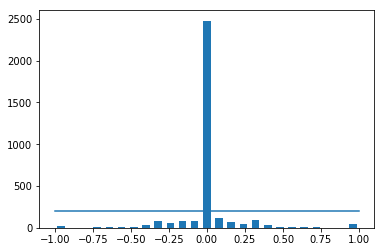

In [5]:
#To set a center angle of the steering wheel
num_bins = 25
samples_per_bin = 200 #max num of sample
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:])*0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data:  3295
removed:  2277
remaining:  1018


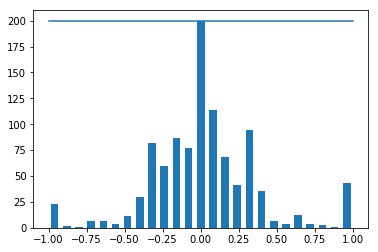

In [6]:
#to get balanced data, because the car didn't trun the steering wheel not much
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
            
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining: ', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [7]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths,steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_05_12_13_06_47_985.jpg
left        left_2019_05_12_13_06_47_985.jpg  
right       right_2019_05_12_13_06_47_985.jpg 
steering    0.0758656                         
throttle    0.849736                          
reverse     0                                 
speed       1.44186                           
Name: 15, dtype: object


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 814
Valid Samples: 204


Text(0.5, 1.0, 'Validation set')

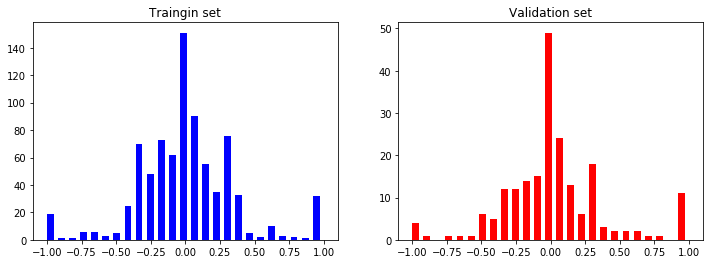

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Traingin set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [10]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135, :,: ]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #chornal convert: effective way to run neural network
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200,66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

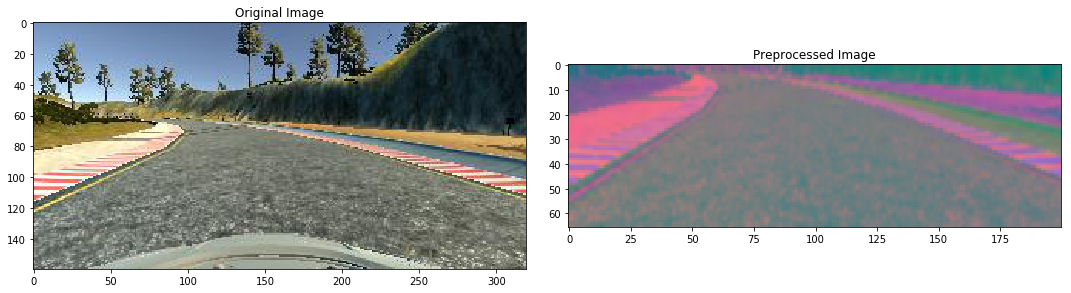

In [11]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [12]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(814, 66, 200, 3)


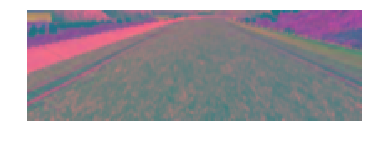

In [13]:
plt.imshow(X_train[random.randint(0, len(X_train - 1))])
plt.axis('off')
print(X_train.shape)

In [14]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5 ,5, subsample=(2, 2), input_shape=(66, 200 ,3), activation='elu'))
    model.add(Convolution2D(36, 5 ,5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5 ,5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Convolution2D(64, 3 ,3, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0,5))
    
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0,5))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model
    

In [15]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)  

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update yo

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 814 samples, validate on 204 samples
Epoch 1/30
814/814 [==============================] - 4s 5ms/step - loss: 0.6662 - val_loss: 0.1380
Epoch 2/30
814/814 [==============================] - 3s 4ms/step - loss: 0.1464 - val_loss: 0.1376
Epoch 3/30
814/814 [==============================] - 3s 4ms/step - loss: 0.1265 - val_loss: 0.1062
Epoch 4/30
814/814 [==============================] - 4s 4ms/step - loss: 0.1166 - val_loss: 0.0982
Epoch 5/30
814/814 [==============================] - 4s 4ms/step - loss: 0.0988 - val_loss: 0.0852
Epoch 6/30
814/814 [==============================] - 4s 4ms/step - loss: 0.0950 - val_loss: 0.0747
Epoch 7/30
814/814 [==============================] - 4s 4ms/step - loss: 0.0852 - val_loss: 0.0696
Epoch 8/30
814/814 [==============================] - 4s 4ms/step - loss: 0.0736 - val_loss: 0.0582
Epoch 9/30
814/814 [==============================] - 4s 4ms/step - loss: 0.0691 - val_loss: 0.0527
Epoch 

Text(0.5, 0, 'Epoch')

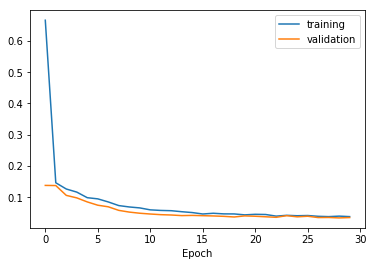

In [17]:
#to check the error between the validation set and training set -> well trained (elu >> relu)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.xlabel('Epoch')

In [18]:
model.save('model.h5')

In [19]:
#from google.colab import files
#files.download('model.h5')